[['BGS', 'BN.PA', 'CPB', 'DGE', 'FIZZ', 'KHC', 'KO', 'MCD', 'MNST', 'PEP', 'SBUX', 'UN'], ['BHP', 'BP', 'CVX', 'ENB', 'FP.PA', 'GE', 'IMO', 'PTR', 'XOM'], ['ADM', 'AGCO', 'BG', 'CAT', 'CF', 'CVGW', 'DE', 'FDP', 'MOS', 'SMG'], ['AA', 'KALU', 'ARLP', 'WME.F', 'SCCO', 'BHP', 'GG', 'MT.AS']]
ret       0.200297
stdev     0.148721
sharpe    1.346804
BGS       0.146691
BN.PA     0.003371
CPB       0.010617
DGE       0.043799
FIZZ      0.111032
KHC       0.001181
KO        0.001711
MCD       0.199374
MNST      0.141290
PEP       0.160615
SBUX      0.178049
UN        0.002270
Name: 78421, dtype: float64
ret       0.113861
stdev     0.115579
sharpe    0.985137
BGS       0.034476
BN.PA     0.083059
CPB       0.122026
DGE       0.169292
FIZZ      0.021547
KHC       0.003033
KO        0.114787
MCD       0.166498
MNST      0.011600
PEP       0.200719
SBUX      0.000140
UN        0.072824
Name: 89273, dtype: float64
ret       0.095691
stdev     0.179422
sharpe    0.533329
BHP       0.047903
BP       

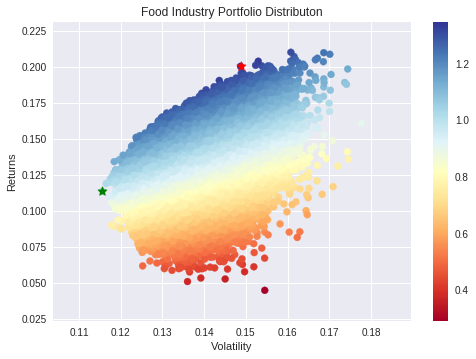

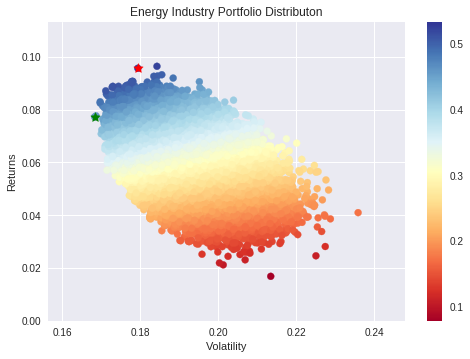

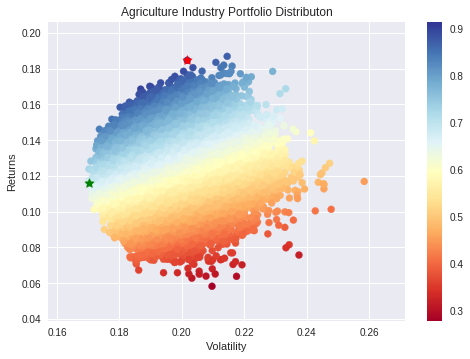

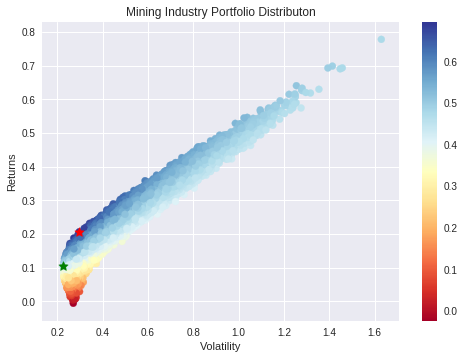

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from collections import OrderedDict
 
#list of stocks in portfolio

# Food Stocks
food = ['KO','MNST','PEP','FIZZ','KHC','SBUX','DGE','MCD','UN','CPB','BGS','BN.PA']
food.sort()


# Energy Stocks
energy =['XOM','CVX','FP.PA','BP','PTR','BHP','GE','IMO','ENB']
energy.sort()


# Agriculture Stocks
agriculture = ['CVGW','AGCO','BG','FDP','MOS','SMG','CF','ADM','CAT','DE']
agriculture.sort()


# Mining Stocks
mining = ['AA','KALU','ARLP','WME.F','SCCO','BHP','GG','MT.AS']
miningFactors = []

# Mixed Stocks
mixed = []
mixed.append(food)
mixed.append(energy)
mixed.append(agriculture)
mixed.append(mining)
mixed.sort()

finalMixed = []

for x in mixed : 
  for y in x:
    finalMixed.append(y)

list(OrderedDict.fromkeys(finalMixed))

stocksArray = []
stocksArray.append(food)
stocksArray.append(energy)
stocksArray.append(agriculture)
stocksArray.append(mining)
# stocksArray.append(finalMixed)

print(stocksArray)

for stocks in stocksArray:
  
  # Get Price Data For Each Stock
  data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']
  data.sort_index(inplace=True)

  # Get Daily Returns, Mean Daily Returns and Covariance 
  dailyReturns = data.pct_change()
  meanDailyReturns = dailyReturns.mean()
  covarianceStocks = dailyReturns.cov()

  # Number of Simulations
  num_portfolios = 100000
  results = np.zeros((4+len(stocks)-1,num_portfolios))

  for i in xrange(num_portfolios):
    
      # Choose Random Weights
      weights = np.array(np.random.random(len(stocks)))
      
      # Normalise The Weights
      weights /= np.sum(weights)

      # Find Returns and Volatility Of Portfolio
      finalReturn = np.sum(meanDailyReturns * weights) * 252
      finalVolatility = np.sqrt(np.dot(weights.T,np.dot(covarianceStocks, weights))) * np.sqrt(252)

      # Save Results 
      results[0,i],results[1,i] = finalReturn,finalVolatility
      
      # Save Sharpe Ratio (minus the risk free element)
      sharpeRatio = results[0,i] / results[1,i]
      results[2,i] = sharpeRatio
      
      for j in range(len(weights)):
          results[j+3,i] = weights[j]

  # Add Results To DataFrame Object
  if len(stocks) == 12:
    finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8],stocks[9],stocks[10],stocks[11]])
  elif len(stocks) == 9:
    finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8]])
  elif len(stocks) == 10:
      finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8],stocks[9]])
  elif len(stocks) == 8: 
    finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7]])
#   else : 
#     finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8],stocks[9],stocks[10],stocks[11],stocks[12],stocks[13],stocks[14],stocks[15],stocks[16],stocks[17],stocks[18],stocks[19],stocks[20],stocks[21],stocks[22],stocks[23],stocks[24],stocks[25],stocks[26],stocks[27],stocks[28],stocks[29],stocks[30],stocks[31],stocks[32],stocks[33],stocks[34],stocks[35],stocks[36],stocks[37],stocks[38]])


  # Portfolios With Best Sharp-Ratio and Lowest Volatility
  bestSharpeRatio,lowestVolatility = finalResults.iloc[finalResults['sharpe'].idxmax()],finalResults.iloc[finalResults['stdev'].idxmin()]
  
  if len(stocks) == 12:
    # Plot Graphs
    plt.figure()
    plt.title('Food Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility)  
  elif len(stocks) == 9:
    plt.figure()
    plt.title('Energy Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility)  
  elif len(stocks) == 10:
    plt.figure()
    plt.title('Agriculture Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility)  
  elif len(stocks) == 8: 
    plt.figure()
    plt.title('Mining Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility) 
  else : 
    plt.figure()
    plt.title('Mixed Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility)
  

[['BGS', 'BN.PA', 'CPB', 'DGE', 'FIZZ', 'KHC', 'KO', 'MCD', 'MNST', 'PEP', 'SBUX', 'UN'], ['BHP', 'BP', 'CVX', 'ENB', 'FP.PA', 'GE', 'IMO', 'PTR', 'XOM'], ['ADM', 'AGCO', 'BG', 'CAT', 'CF', 'CVGW', 'DE', 'FDP', 'MOS', 'SMG'], ['AA', 'KALU', 'ARLP', 'WME.F', 'SCCO', 'BHP', 'GG', 'MT.AS']]
ret       0.160470
stdev     0.144852
sharpe    1.107822
BGS       0.141125
BN.PA     0.013786
CPB       0.014732
DGE       0.031934
FIZZ      0.083199
KHC       0.000629
KO        0.145194
MCD       0.190285
MNST      0.146092
PEP       0.051511
SBUX      0.151965
UN        0.029548
Name: 15557, dtype: float64
ret       0.096359
stdev     0.116302
sharpe    0.828525
BGS       0.009502
BN.PA     0.167061
CPB       0.064335
DGE       0.167080
FIZZ      0.002617
KHC       0.005330
KO        0.181227
MCD       0.105868
MNST      0.002793
PEP       0.174453
SBUX      0.059009
UN        0.060724
Name: 44245, dtype: float64
ret       0.068083
stdev     0.180457
sharpe    0.377282
BHP       0.006772
BP       

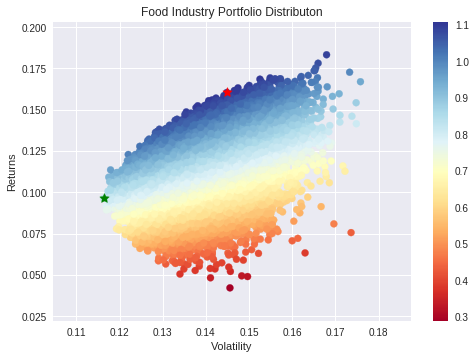

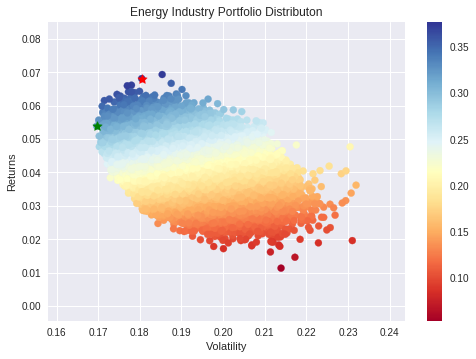

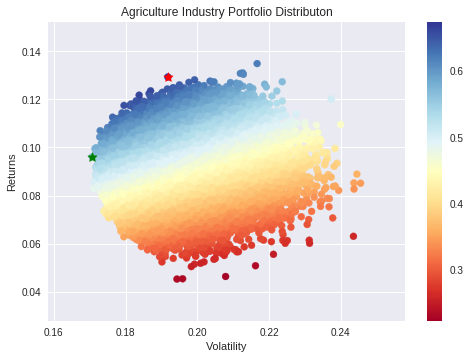

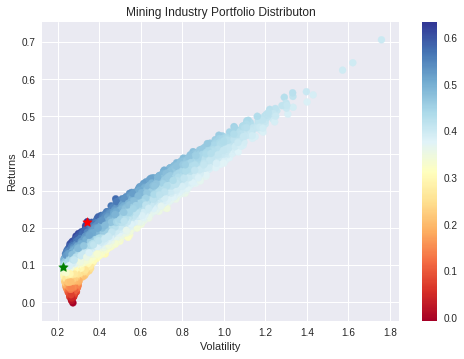

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# List Of Stocks In Portfolio

# Food Stocks
food = ['KO','MNST','PEP','FIZZ','KHC','SBUX','DGE','MCD','UN','CPB','BGS','BN.PA']
food.sort()
foodFactors = [0.9,0.85,0.85,0.85,0.75,0.65,0.85,0.75,0.85,0.9,0.9,0.9]



# Energy Stocks
energy =['XOM','CVX','FP.PA','BP','PTR','BHP','GE','IMO','ENB']
energy.sort()
energyFactors = [0.7,0.7,0.8,0.6,0.7,0.8,0.7,0.65,0.7]


# Agriculture Stocks
agriculture = ['CVGW','AGCO','BG','FDP','MOS','SMG','CF','ADM','CAT','DE']
agriculture.sort()
agricultureFactors = [0.9,0.8,0.7,0.7,0.65,0.65,0.85,0.8,0.8,0.8]


# Mining Stocks
mining = ['AA','KALU','ARLP','WME.F','SCCO','BHP','GG','MT.AS']
miningFactors = []
miningFactors = [0.95,0.95,0.95,0.95,0.95,0.9,0.9,0.85]


finalMixed = []

for x in mixed : 
  for y in x:
    finalMixed.append(y)
    

mixedFactors = []
mixedFactors.append(foodFactors)
mixedFactors.append(energyFactors)
mixedFactors.append(agricultureFactors)
mixedFactors.append(miningFactors)

finalMixedFactors = []

for x in mixed : 
  for y in x:
    finalMixedFactors.append(y)
    
stocksArray = []
stocksArray.append(food)
stocksArray.append(energy)
stocksArray.append(agriculture)
stocksArray.append(mining)


print(stocksArray)

for stocks in stocksArray:
  
  # Get Price Data For Each Stock
  data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']
  data.sort_index(inplace=True)

  # Get Daily Returns, Mean Daily Returns and Covariance 
  dailyReturns = data.pct_change()
  meanDailyReturns = dailyReturns.mean()
  covarianceStocks = dailyReturns.cov()
  
  
  if len(stocks) == 12:
    meanDailyReturns=[x*y for x, y in zip(foodFactors, meanDailyReturns)]
  elif len(stocks) == 9:
    meanDailyReturns=[x*y for x, y in zip(energyFactors, meanDailyReturns)]
  elif len(stocks) == 10:
    meanDailyReturns=[x*y for x, y in zip(agricultureFactors, meanDailyReturns)]
  elif len(stocks) == 8: 
    meanDailyReturns=[x*y for x, y in zip(miningFactors, meanDailyReturns)]
  else :
    meanDailyReturns=[x*y for x, y in zip(mixedFactors, meanDailyReturns)]


  # Number of Simulations
  num_portfolios = 100000
  results = np.zeros((4+len(stocks)-1,num_portfolios))

  for i in xrange(num_portfolios):
    
      # Choose Random Weights
      weights = np.array(np.random.random(len(stocks)))
      
      # Normalise The Weights
      weights /= np.sum(weights)

      # Find Returns and Volatility Of Portfolio
      finalReturn = np.sum(meanDailyReturns * weights) * 252
      finalVolatility = np.sqrt(np.dot(weights.T,np.dot(covarianceStocks, weights))) * np.sqrt(252)

      # Save Results 
      results[0,i],results[1,i] = finalReturn,finalVolatility
      
      # Save Sharpe Ratio (minus the risk free element)
      sharpeRatio = results[0,i] / results[1,i]
      results[2,i] = sharpeRatio
      
      for j in range(len(weights)):
          results[j+3,i] = weights[j]

  # Add Results To DataFrame Object
  if len(stocks) == 12:
    finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8],stocks[9],stocks[10],stocks[11]])
  elif len(stocks) == 9:
    finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8]])
  elif len(stocks) == 10:
      finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8],stocks[9]])
  elif len(stocks) == 8: 
    finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7]])
#   else : 
#     finalResults = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8],stocks[9],stocks[10],stocks[11],stocks[12],stocks[13],stocks[14],stocks[15],stocks[16],stocks[17],stocks[18],stocks[19],stocks[20],stocks[21],stocks[22],stocks[23],stocks[24],stocks[25],stocks[26],stocks[27],stocks[28],stocks[29],stocks[30],stocks[31],stocks[32],stocks[33],stocks[34],stocks[35],stocks[36],stocks[37],stocks[38]])


  # Portfolios With Best Sharp-Ratio and Lowest Volatility
  bestSharpeRatio,lowestVolatility = finalResults.iloc[finalResults['sharpe'].idxmax()],finalResults.iloc[finalResults['stdev'].idxmin()]
  
  if len(stocks) == 12:
    # Plot Graphs
    plt.figure()
    plt.title('Food Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility)  
  elif len(stocks) == 9:
    plt.figure()
    plt.title('Energy Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility)  
  elif len(stocks) == 10:
    plt.figure()
    plt.title('Agriculture Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility)  
  elif len(stocks) == 8: 
    plt.figure()
    plt.title('Mining Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility) 
  else : 
    plt.figure()
    plt.title('Mixed Industry Portfolio Distributon')
    plt.scatter(finalResults.stdev,finalResults.ret,c=finalResults.sharpe,cmap='RdYlBu')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()
    plt.scatter(bestSharpeRatio[1],bestSharpeRatio[0],marker=(5,1,0),color='r',s=100)
    plt.scatter(lowestVolatility[1],lowestVolatility[0],marker=(5,1,0),color='g',s=100)
    print(bestSharpeRatio)
    print(lowestVolatility)
  
  